# <p style='text-align: center;'> Transformers In NLP </p>

## Introduction
**NLP’s Transformer** is a new architecture that aims to solve tasks sequence-to-sequence while easily handling long-distance dependencies. Computing the input and output representations without using sequence-aligned RNNs or convolutions and it relies entirely on self-attention. Lets look in detail what are transformers.

Transformers are taking the natural language processing world by storm. These incredible models are breaking multiple NLP records and pushing the state of the art. They are used in many applications like machine language translation, conversational chatbots, and even to power better search engines. Transformers are the rage in deep learning nowadays, but how do they work? Why have they outperform the previous king of sequence problems, like recurrent neural networks, GRU’s, and LSTM’s? You’ve probably heard of different famous transformers models like BERT, GPT, and GPT2. In this post, we’ll focus on the one paper that started it all, "Attention is all you need".

## Attention Mechanism
To understand transformers we first must understand the attention mechanism. The Attention mechanism enables the transformers to have extremely long term memory. A transformer model can “attend” or “focus” on all previous tokens that have been generated.

Let’s walk through an example. Say we want to write a short sci-fi novel with a generative transformer. Using Hugging Face’s Write With Transformer application, we can do just that. We’ll prime the model with our input, and the model will generate the rest.

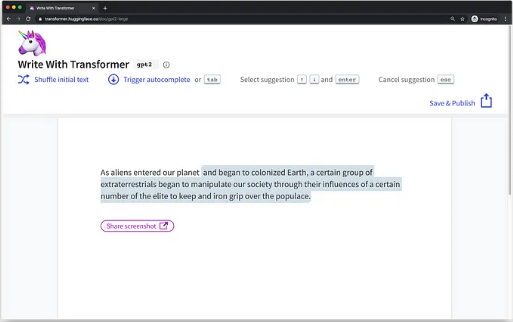

**Our input:** “As Aliens entered our planet”.

**Transformer output:** "and began to colonized Earth, a certain group of extraterrestrials began to manipulate our society through their influences of a certain number of the elite to keep and iron grip over the populace."

Ok, so the story is a little dark but what’s interesting is how the model generated it. As the model generates the text word by word, it can “attend” or “focus” on words that are relevant to the generated word. The ability to know what words to attend too is all learned during training through backpropagation.

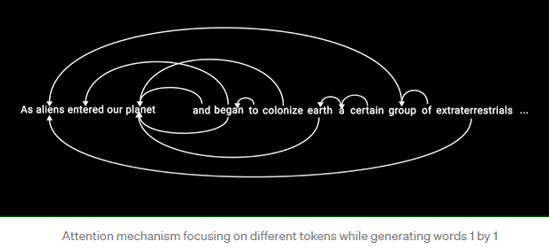

Recurrent neural networks (RNN) are also capable of looking at previous inputs too. But the power of the attention mechanism is that it doesn’t suffer from short term memory. RNN’s have a shorter window to reference from, so when the story gets longer, RNN’s can’t access words generated earlier in the sequence. This is still true for Gated Recurrent Units (GRU’s) and Long-short Term Memory (LSTM’s) networks, although they do a bigger capacity to achieve longer-term memory, therefore, having a longer window to reference from. The attention mechanism, in theory, and given enough compute resources, have an infinite window to reference from, therefore being capable of using the entire context of the story while generating the text.

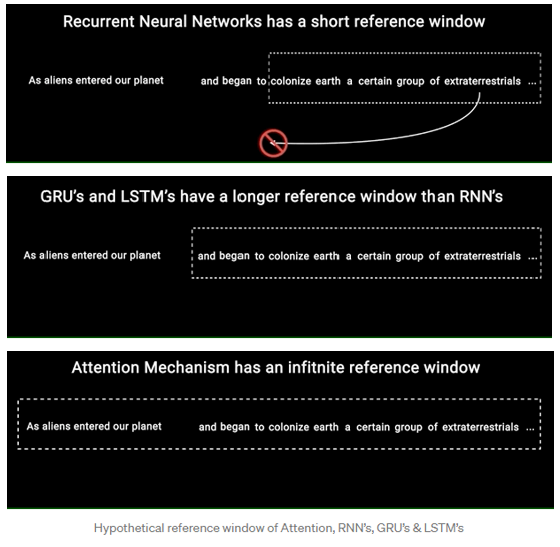

## Attention Is All You Need — Step by Step Walkthrough
The attention mechanism’s power was demonstrated in the paper “Attention Is All You Need”, where the authors introduced a new novel neural network called the **Transformers** which is an attention-based encoder-decoder type architecture.

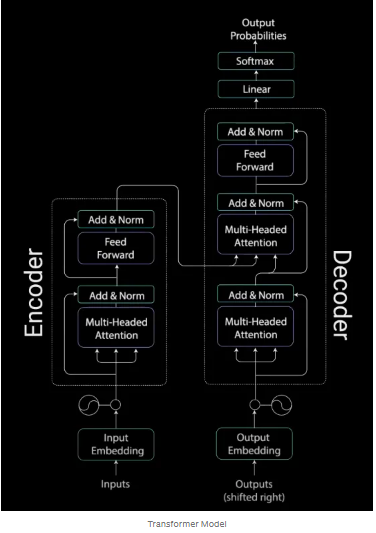

On a high level, the encoder maps an input sequence into an abstract continuous representation that holds all the learned information of that input. The decoder then takes that continuous representation and step by step generates a single output while also being fed the previous output.

Let’s walk through an example. The paper applied the Transformer model on a neural machine translation problem. In this post, we’ll demonstrate how it’ll work for a conversational chatbot.

**Our Input:** "Hi how are you"

**Transformer Output:** "I am fine"

### Input Embeddings
The first step is feeding out input into a word embedding layer. A word embedding layer can be thought of as a lookup table to grab a learned vector representation of each word. Neural networks learn through numbers so each word maps to a vector with continuous values to represent that word.

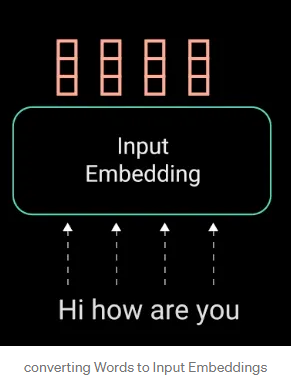


### Positional Encoding
The next step is to inject positional information into the embeddings. Because the transformer encoder has no recurrence like recurrent neural networks, we must add some information about the positions into the input embeddings. This is done using positional encoding. The authors came up with a clever trick using sin and cosine functions.

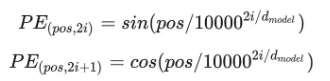

We won’t go into the mathematical details of positional encoding, but here are the basics. For every odd index on the input vector, create a vector using the cos function. For every even index, create a vector using the sin function. Then add those vectors to their corresponding input embeddings. This successfully gives the network information on the position of each vector. The sin and cosine functions were chosen in tandem because they have linear properties the model can easily learn to attend to.

### Encoder Layer
Now we have the encoder layer. The Encoders layers job is to map all input sequences into an abstract continuous representation that holds the learned information for that entire sequence. It contains 2 sub-modules, multi-headed attention, followed by a fully connected network. There are also residual connections around each of the two sublayers followed by a layer normalization.

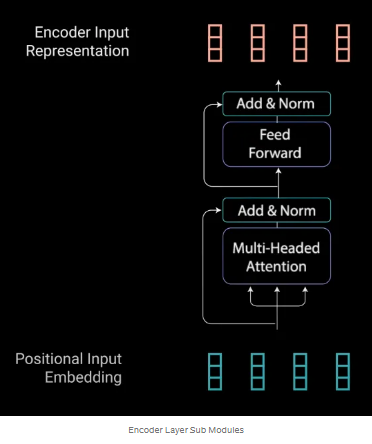

To break this down, let’s first look at the multi-headed attention module.

### Multi-Headed Attention
Multi-headed attention in the encoder applies a specific attention mechanism called self-attention. Self-attention allows the models to associate each word in the input, to other words. So in our example, it’s possible that our model can learn to associate the word “you”, with “how” and “are”. It’s also possible that the model learns that words structured in this pattern are typically a question so respond appropriately.

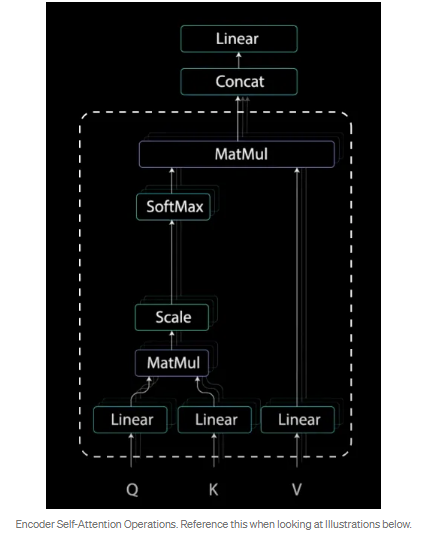


### Query, Key, and Value Vectors
To achieve self-attention, we feed the input into 3 distinct fully connected layers to create the query, key, and value vectors.

The query key and value concept come from retrieval systems. For example, when you type a query to search for some video on Youtube, the search engine will map your **query** against a set of **keys** (video title, description etc.) associated with candidate videos in the database, then present you the best matched videos (**values**).

### Dot Product of Query and Key
After feeding the query, key, and value vector through a linear layer, the queries and keys undergo a dot product matrix multiplication to produce a score matrix.

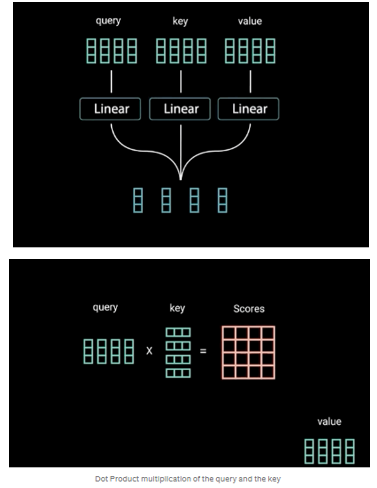

The score matrix determines how much focus should a word be put on other words. So each word will have a score that corresponds to other words in the time-step. The higher the score the more focus. This is how the queries are mapped to the keys.

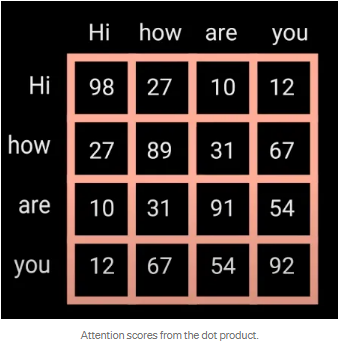


### Scaling Down the Attention Scores
Then, the scores get scaled down by getting divided by the square root of the dimension of query and key. This is to allow for more stable gradients, as multiplying values can have exploding effects.

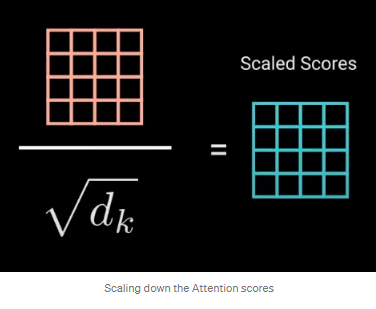


### Softmax of the Scaled Scores
Next, you take the softmax of the scaled score to get the attention weights, which gives you probability values between 0 and 1. By doing a softmax the higher scores get heighten, and lower scores are depressed. This allows the model to be more confident about which words to attend too.

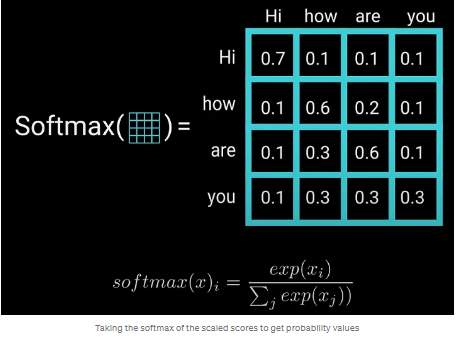

### Multiply Softmax Output with Value vector
Then you take the attention weights and multiply it by your value vector to get an output vector. The higher softmax scores will keep the value of words the model learns is more important. The lower scores will drown out the irrelevant words. Then you feed the output of that into a linear layer to process.

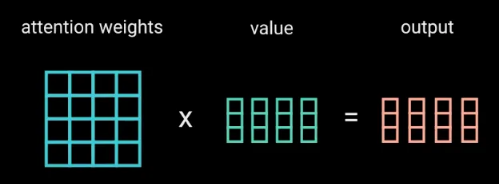

### Computing Multi-headed Attention
To make this a multi-headed attention computation, you need to split the query, key, and value into N vectors before applying self-attention. The split vectors then go through the self-attention process individually. Each self-attention process is called a head. Each head produces an output vector that gets concatenated into a single vector before going through the final linear layer. In theory, each head would learn something different therefore giving the encoder model more representation power.

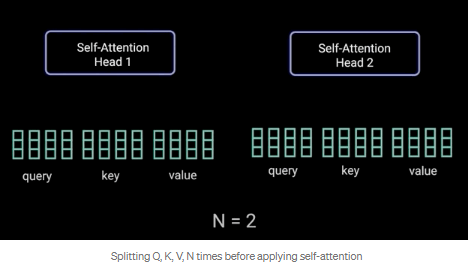

To sum it up, multi-headed attention is a module in the transformer network that computes the attention weights for the input and produces an output vector with encoded information on how each word should attend to all other words in the sequence.

### The Residual Connections, Layer Normalization, and Feed Forward Network
The multi-headed attention output vector is added to the original positional input embedding. This is called a **residual connection**. The output of the residual connection goes through a layer normalization.

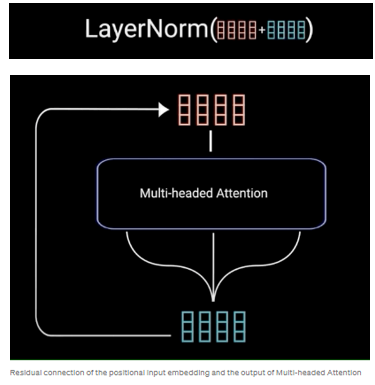

The normalized residual output gets projected through a pointwise feed-forward network for further processing. The pointwise feed-forward network is a couple of linear layers with a ReLU activation in between. The output of that is then again added to the input of the pointwise feed-forward network and further normalized.

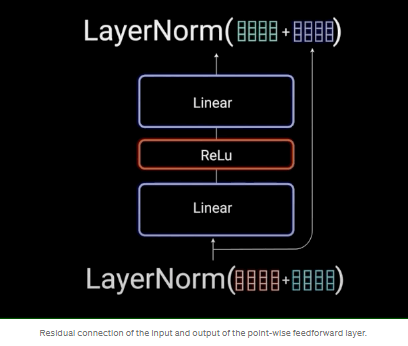

The residual connections help the network train, by allowing gradients to flow through the networks directly. The layer normalizations are used to stabilize the network which results in substantially reducing the training time necessary. The pointwise feedforward layer is used to project the attention outputs potentially giving it a richer representation.


### Encoder Wrap-up
That wraps up the encoder layer. All of these operations are to encode the input to a continuous representation with attention information. This will help the decoder focus on the appropriate words in the input during the decoding process. You can stack the encoder N times to further encode the information, where each layer has the opportunity to learn different attention representations therefore potentially boosting the predictive power of the transformer network.


### Decoder Layer
The decoder’s job is to generate text sequences. The decoder has a similar sub-layer as the encoder. it has two multi-headed attention layers, a pointwise feed-forward layer, and residual connections, and layer normalization after each sub-layer. These sub-layers behave similarly to the layers in the encoder but each multi-headed attention layer has a different job. The decoder is capped off with a linear layer that acts as a classifier, and a softmax to get the word probabilities.

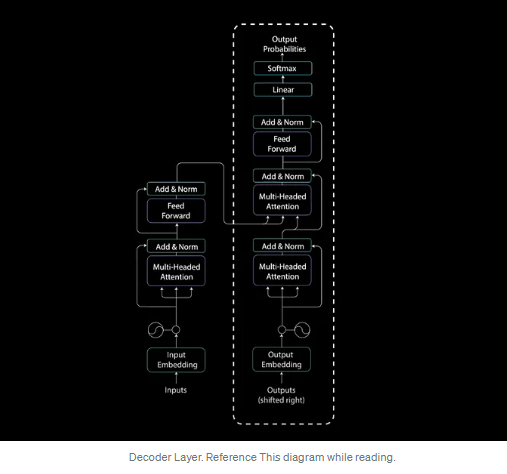

The decoder is autoregressive, it begins with a start token, and it takes in a list of previous outputs as inputs, as well as the encoder outputs that contain the attention information from the input. The decoder stops decoding when it generates a token as an output.

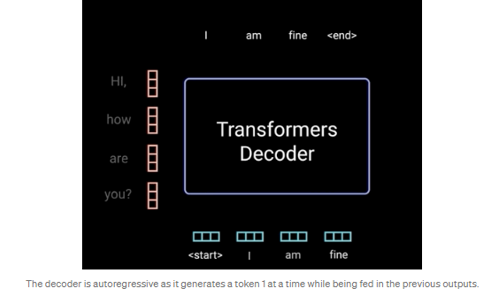

Let’s walk through the decoding steps.


### Decoder Input Embeddings & Positional Encoding
The beginning of the decoder is pretty much the same as the encoder. The input goes through an embedding layer and positional encoding layer to get positional embeddings. The positional embeddings get fed into the first multi-head attention layer which computes the attention scores for the decoder’s input.


### Decoders First Multi-Headed Attention
This multi-headed attention layer operates slightly differently. Since the decoder is autoregressive and generates the sequence word by word, you need to prevent it from conditioning to future tokens. For example, when computing attention scores on the word “am”, you should not have access to the word “fine”, because that word is a future word that was generated after. The word “am” should only have access to itself and the words before it. This is true for all other words, where they can only attend to previous words.

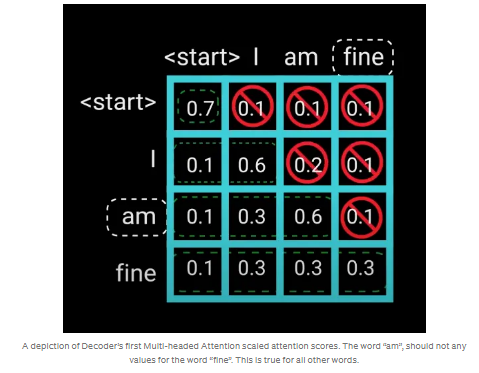

We need a method to prevent computing attention scores for future words. This method is called **masking**. To prevent the decoder from looking at future tokens, you apply a look ahead mask. The mask is added before calculating the softmax, and after scaling the scores. Let’s take a look at how this works.

### Look-Ahead Mask
The mask is a matrix that’s the same size as the attention scores filled with values of 0’s and negative infinities. When you add the mask to the scaled attention scores, you get a matrix of the scores, with the top right triangle filled with negativity infinities.

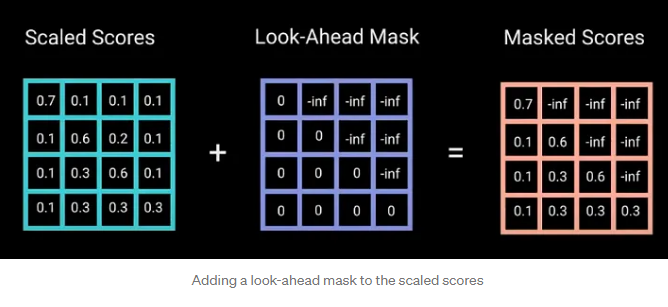

The reason for the mask is because once you take the softmax of the masked scores, the negative infinities get zeroed out, leaving zero attention scores for future tokens. As you can see in the figure below, the attention scores for “am”, has values for itself and all words before it but is zero for the word “fine”. This essentially tells the model to put no focus on those words.

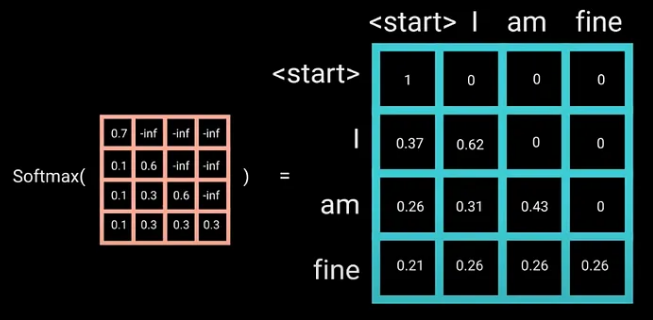

**This masking is the only difference in how the attention scores are calculated in the first multi-headed attention layer**. This layer still has multiple heads, that the mask is being applied to, before getting concatenated and fed through a linear layer for further processing. The output of the first multi-headed attention is a masked output vector with information on how the model should attend on the decoder’s input.

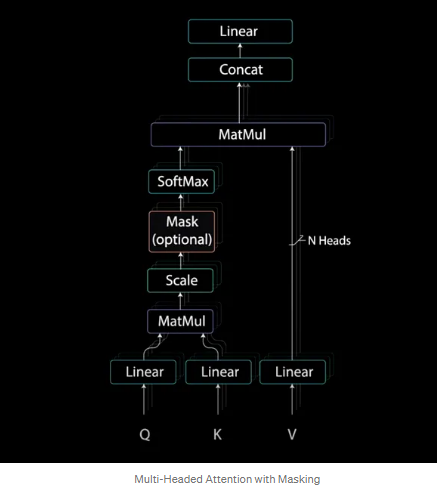


### Decoder Second Multi-Headed Attention, and Point-wise Feed Forward Layer
The second multi-headed attention layer. For this layer, the encoder’s outputs are the queries and the keys, and the first multi-headed attention layer outputs are the values. This process matches the encoder’s input to the decoder’s input, allowing the decoder to decide which encoder input is relevant to put a focus on. The output of the second multi-headed attention goes through a pointwise feedforward layer for further processing.


### Linear Classifier and Final Softmax for Output Probabilities
The output of the final pointwise feedforward layer goes through a final linear layer, that acts as a classifier. The classifier is as big as the number of classes you have. For example, if you have 10,000 classes for 10,000 words, the output of that classier will be of size 10,000. The output of the classifier then gets fed into a softmax layer, which will produce probability scores between 0 and 1. We take the index of the highest probability score, and that equals our predicted word.

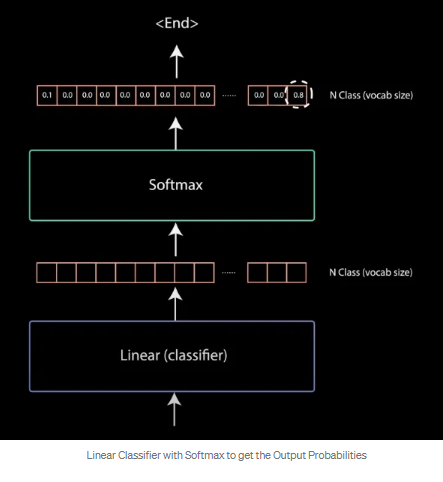

The decoder then takes the output, add’s it to the list of decoder inputs, and continues decoding again until a token is predicted. For our case, the highest probability prediction is the final class which is assigned to the end token.

The decoder can also be stacked N layers high, each layer taking in inputs from the encoder and the layers before it. By stacking the layers, the model can learn to extract and focus on different combinations of attention from its attention heads, potentially boosting its predictive power.

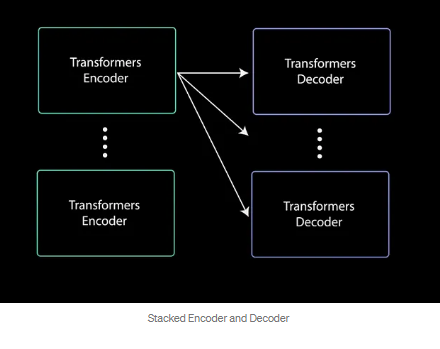


### And That’s It!
And that’s it! That’s the mechanics of the transformers. Transformers leverage the power of the attention mechanism to make better predictions. Recurrent Neural networks try to achieve similar things, but because they suffer from short term memory. Transformers can be better especially if you want to encode or generate long sequences. Because of the transformer architecture, the natural language processing industry can achieve unprecedented results.

## Advantages of Transformers

1. They hold the potential to understand the relationship between sequential elements that are far from each other.


2. They are way more accurate.


3. They pay equal attention to all the elements in the sequence.


4. Transformers can process and train more data in lesser time.


5. They could work with virtually any kind of sequential data.


6. Transformers serve to be helpful in anomaly detection.

## Disadvantages of Transformers
1. The fundamental weakness in Transformer architecture is that it’s **hard to control its attention**. As a result, Transformer-based machine translator can skip or repeat words. For example, let’s translate “one one one one two two one one twenty two” using Google translate. The result will be “один, один, один, два, два, один, двадцать, два.” When we translate the result from Russian back to English, we will get “one one one two two one twenty two”. Two words have been lost in translation:

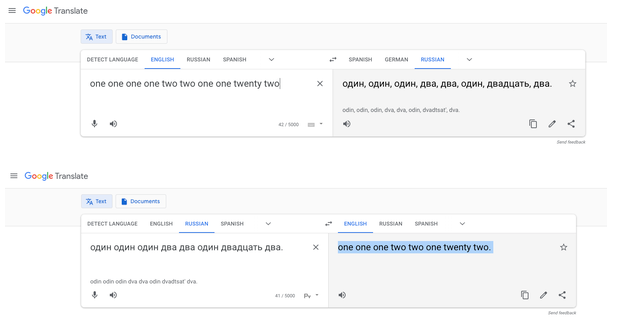